In [1]:
pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=119aefc642822f5eafacf73adf7fab7538f5166042f0a2dc3c01135aafb4af18
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built MiniSom


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/drive/MyDrive/PCA_output_22aug.csv")

In [6]:
df.shape

(755806, 46)

In [7]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,35,36,37,38,39,40,41,42,43,44
0,0,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321
1,1,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321
2,2,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321
3,3,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321
4,4,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321


In [8]:
df = df.drop("Unnamed: 0",axis=1)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,-0.041187,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321
1,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,-0.041187,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321
2,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,-0.041187,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321
3,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,-0.041187,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321
4,17.232379,-3.289137,-4.64486,0.114066,-0.106241,-0.348341,0.186889,-0.037875,-0.087928,-0.041187,...,0.004379,-0.009018,0.011555,-0.018381,0.002693,0.005358,-0.012805,-0.007929,-0.036097,0.009321


In [10]:
df = np.array(df)

In [11]:
from minisom import MiniSom

In [12]:
SOM = MiniSom(17,17, 45, sigma=0.5, learning_rate=.1,neighborhood_function='gaussian',activation_distance='cosine',random_seed=100)

In [13]:
SOM.train_batch(df, 755806, verbose=True)


 [ 755806 / 755806 ] 100% - 0:00:00 left 

/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 1.2161426147785703


In [14]:
som_shape = (17,17)

In [19]:
# each neuron represents a cluster
winner_coordinates = np.array([SOM.winner(x) for x in df]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [20]:
(np.unique(cluster_index))

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
        14,  16,  17,  19,  20,  21,  22,  23,  24,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  42,  43,  44,
        45,  46,  47,  48,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  66,  67,  73,  74,  77,  78,  79,  80,
        81,  82,  83,  84,  86,  87,  88,  89,  92,  93,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 113, 114,
       115, 116, 117, 118, 120, 121, 122, 123, 125, 127, 130, 131, 132,
       133, 134, 135, 139, 140, 141, 142, 147, 149, 150, 151, 152, 155,
       156, 158, 159, 160, 162, 165, 166, 167, 169, 172, 173, 174, 175,
       176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 203, 205,
       206, 207, 209, 210, 211, 212, 213, 215, 216, 218, 219, 224, 225,
       226, 227, 229, 230, 231, 232, 233, 234, 235, 237, 238, 23

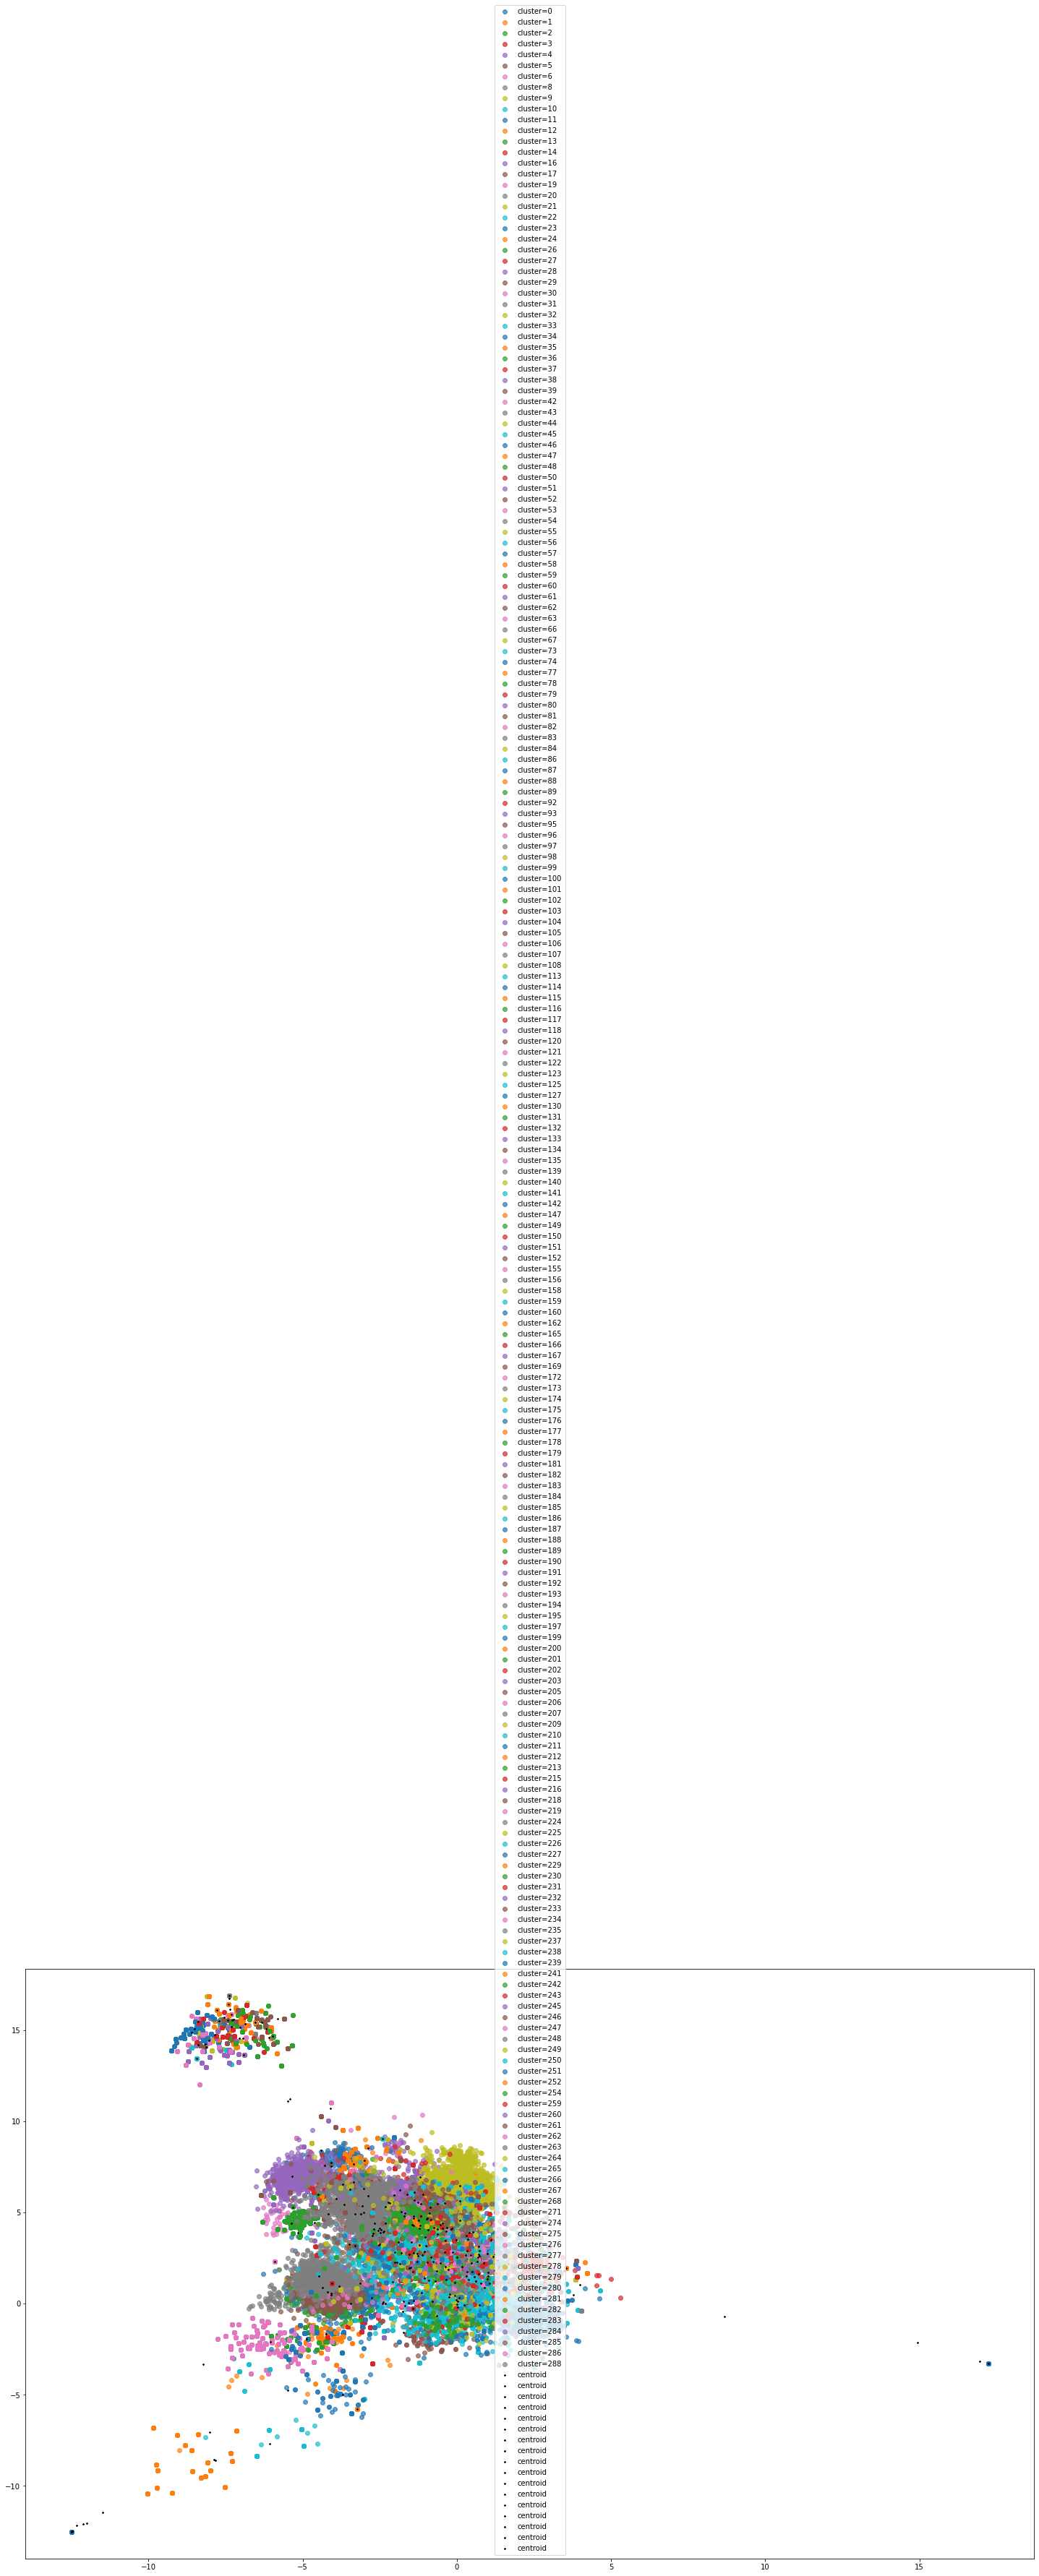

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,15))
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(df[cluster_index == c, 0],df[cluster_index == c, 1] ,label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in SOM.get_weights():
   plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',  s=3, linewidths=15, color='k', label='centroid')
plt.legend();

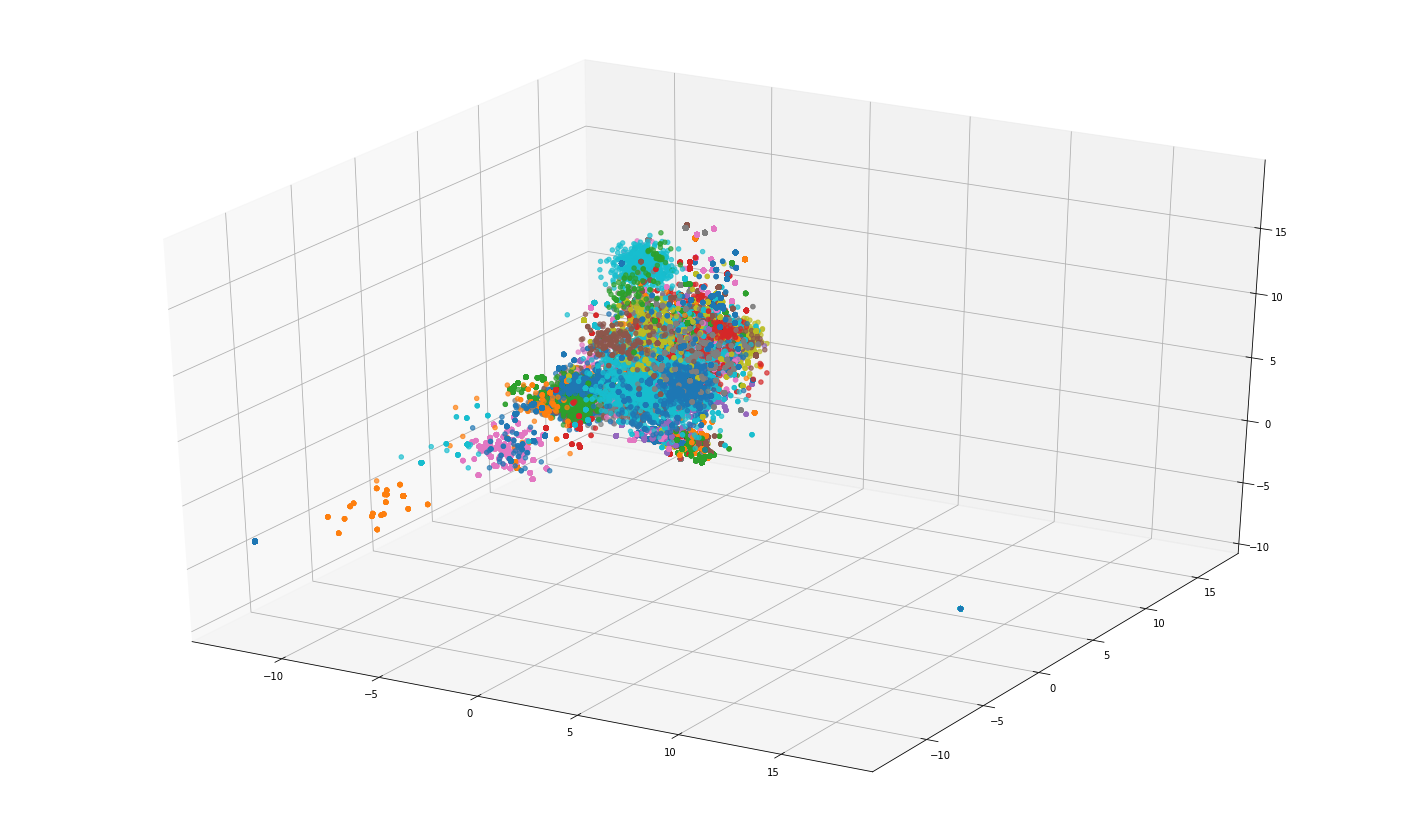

In [25]:
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111, projection='3d')
for c in np.unique(cluster_index):
  ax.scatter(df[cluster_index == c, 0],df[cluster_index == c, 1],df[cluster_index == c, 2],label='cluster='+str(c), alpha=.7)

In [22]:
for i in np.unique(cluster_index):
 print("cluster no. - > ",i," = ",len(df[cluster_index==i])," templates")

cluster no. - >  0  =  695  templates
cluster no. - >  1  =  283  templates
cluster no. - >  2  =  602  templates
cluster no. - >  3  =  647  templates
cluster no. - >  4  =  644  templates
cluster no. - >  5  =  455  templates
cluster no. - >  6  =  7024  templates
cluster no. - >  8  =  37996  templates
cluster no. - >  9  =  7  templates
cluster no. - >  10  =  54  templates
cluster no. - >  11  =  860  templates
cluster no. - >  12  =  612  templates
cluster no. - >  13  =  492  templates
cluster no. - >  14  =  1  templates
cluster no. - >  16  =  1650  templates
cluster no. - >  17  =  138  templates
cluster no. - >  19  =  47  templates
cluster no. - >  20  =  1614  templates
cluster no. - >  21  =  93  templates
cluster no. - >  22  =  1451  templates
cluster no. - >  23  =  1162  templates
cluster no. - >  24  =  5685  templates
cluster no. - >  26  =  393  templates
cluster no. - >  27  =  1365  templates
cluster no. - >  28  =  4392  templates
cluster no. - >  29  =  729  te

In [58]:
for i in np.unique(cluster_index):
 if len(df[cluster_index==i]) <= 100:
  print("cluster no. - > ",i," = ",len(df[cluster_index==i])," templates")

cluster no. - >  9  =  7  templates
cluster no. - >  10  =  54  templates
cluster no. - >  14  =  1  templates
cluster no. - >  19  =  47  templates
cluster no. - >  21  =  93  templates
cluster no. - >  32  =  40  templates
cluster no. - >  51  =  2  templates
cluster no. - >  53  =  98  templates
cluster no. - >  80  =  4  templates
cluster no. - >  96  =  84  templates
cluster no. - >  99  =  26  templates
cluster no. - >  102  =  13  templates
cluster no. - >  108  =  12  templates
cluster no. - >  115  =  16  templates
cluster no. - >  116  =  98  templates
cluster no. - >  139  =  5  templates
cluster no. - >  140  =  29  templates
cluster no. - >  152  =  2  templates
cluster no. - >  155  =  11  templates
cluster no. - >  172  =  90  templates
cluster no. - >  173  =  72  templates
cluster no. - >  177  =  35  templates
cluster no. - >  186  =  63  templates
cluster no. - >  188  =  80  templates
cluster no. - >  191  =  85  templates
cluster no. - >  195  =  2  templates
clust

In [61]:
arr=[]
for i in np.unique(cluster_index):
 if len(df[cluster_index==i]) <= 100:
    arr.append(i)

In [62]:
len(np.unique(cluster_index))

218

In [63]:
data = pd.read_csv("/content/drive/MyDrive/PCA_output_22aug.csv")

In [64]:
data["cluster_index"]=pd.Series(cluster_index)

In [65]:
search=pd.read_csv("/content/drive/MyDrive/22AUGUST2022/Output/input.csv_structured.csv")

In [66]:
search=search[1:]

In [67]:
search

,LineId,Pid,Time,Content,EventId,EventTemplate,ParameterList
1,2,0.0,2022-07-22 08:26:11.900364000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[]
2,3,1.0,2022-07-22 08:26:11.924418000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[]
3,4,2.0,2022-07-22 08:26:11.948384000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[]
4,5,3.0,2022-07-22 08:26:11.969058000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[]
5,6,4.0,2022-07-22 08:26:11.996414000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[]
...,...,...,...,...,...,...,...
755802,755803,755801.0,2022-07-22 08:41:20.704867000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[]
755803,755804,755802.0,2022-07-22 08:41:20.728855000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[]
755804,755805,755803.0,2022-07-22 08:41:20.752746000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[]
755805,755806,755804.0,2022-07-22 08:41:20.780820000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[]


In [68]:
search["cluster_index"] = cluster_index

In [69]:
anomaly=search[search["cluster_index"].isin(arr)]

In [70]:
anomaly.shape

(1459, 8)

In [71]:
anomaly

,LineId,Pid,Time,Content,EventId,EventTemplate,ParameterList,cluster_index
935,936,934.0,2022-07-22 08:21:11.364366000,+: : error : virnetsocketreadwire: : end of fi...,a6242066,<*> <*> <*> end of file while reading data inp...,"['', ': error : virnetsocketreadwire: :']",279
1014,1015,1013.0,2022-07-22 08:44:25.011650844,com.vistara.api.auth.authutil - sending bad re...,f2e2ca8e,<*> - <*> <*> <*> <*> <*> integration is not a...,[],116
1441,1442,1440.0,2022-07-22 08:44:27.180150231,"""com.vistara.api.filter.apifilter - api failed...",cc3c8b97,"""com.vistara.api.filter.apifilter - api failed...","['bca--a-abff-baadebb,', 'api.vistara.io/api/v...",53
1455,1456,1454.0,2022-07-22 08:44:28.133619948,com.vistara.api.service.sdesk.sdeskapidatautil...,8b5829b3,<*> - <*> <*> <*> <*> <*> <*> exception invali...,['com.vistara.api.service.sdesk.sdeskapidataut...,96
2388,2389,2387.0,2022-07-22 08:26:12.309212903,: connection has been abandoned pooledconnecti...,e18922ee,connection has been abandoned pooledconnection...,[],173
...,...,...,...,...,...,...,...,...
755802,755803,755801.0,2022-07-22 08:41:20.704867000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[],239
755803,755804,755802.0,2022-07-22 08:41:20.728855000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[],239
755804,755805,755803.0,2022-07-22 08:41:20.752746000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[],239
755805,755806,755804.0,2022-07-22 08:41:20.780820000,megaraid_sas ::.: mr_dcmd_pd_list_query failed...,b7a7b897,megaraid_sas . mr_dcmd_pd_list_query failed/no...,[],239


In [72]:
len(anomaly["EventId"].unique())

101